# Build a Deep Neural Network


## Load training data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


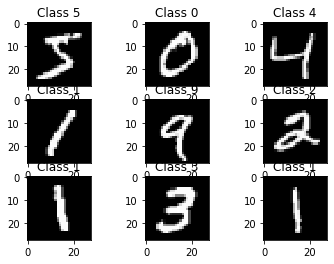

In [ ]:
# Let's look at some examples of the training data

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Modify the target matrices to be in the one-hot format, i.e.
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
type(y_test)

numpy.ndarray

## Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network. 



In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probability distribution, that is
                                 # its values are all non-negative and sum to 1 

## Compile the model
Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a computation graph in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## Train the model!

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 8s 7ms/step - loss: 0.2519 - accuracy: 0.9249 - val_loss: 0.0980 - val_accuracy: 0.9700
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0748 - val_accuracy: 0.9761
Epoch 3/4
469/469 [==============================] - 3s 5ms/step - loss: 0.0712 - accuracy: 0.9779 - val_loss: 0.0711 - val_accuracy: 0.9769
Epoch 4/4
469/469 [==============================] - 3s 5ms/step - loss: 0.0549 - accuracy: 0.9823 - val_loss: 0.0702 - val_accuracy: 0.9786


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07022885233163834
Test accuracy: 0.978600025177002


## Inspecting the output
It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
print("Correct: {} Incorrect: {}".format(len(correct_indices),len(incorrect_indices)))

Correct: 9786 Incorrect: 214


In [ ]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

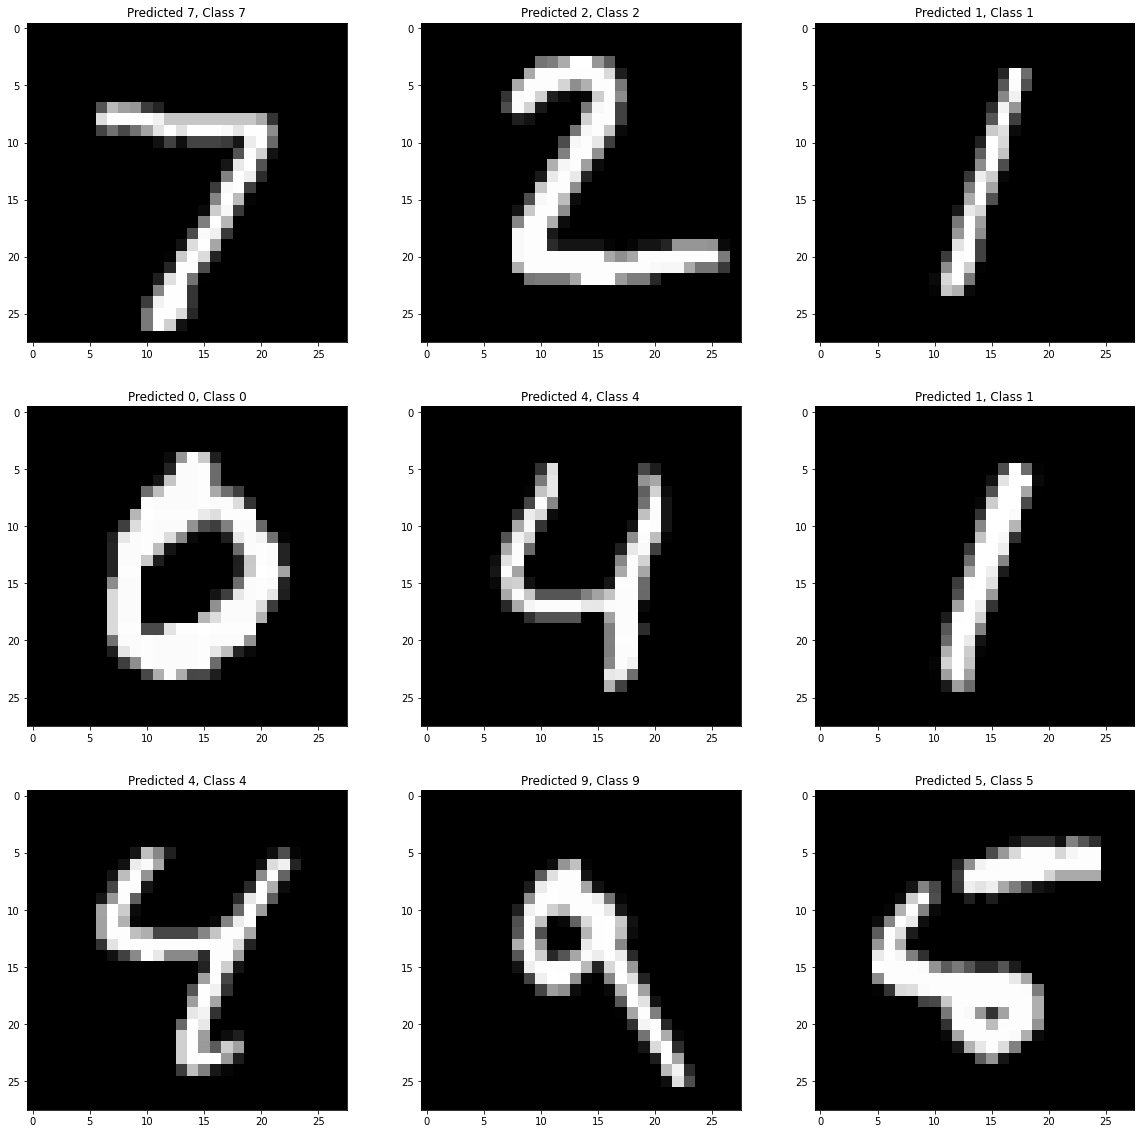

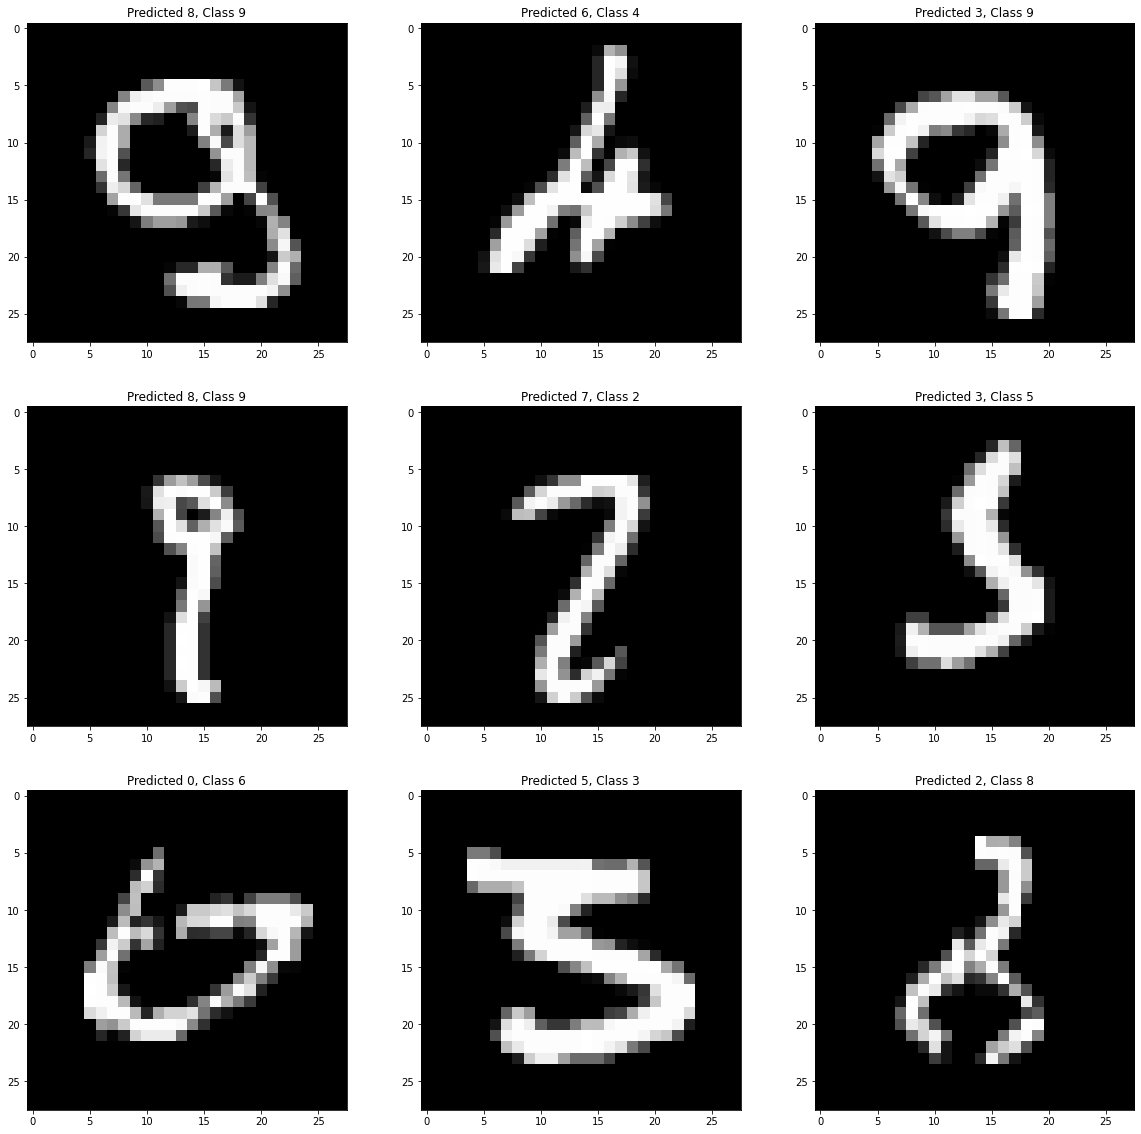

In [ ]:
plt.figure(figsize=(20,20))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure(figsize=(20,20))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Part II (75 points) Dataset 2: Building neural network for protein classification

Overview
(75 points) Develop a deep learning workflow for a classification model and explore different techniques to improve the feature learning.

In this assignment, we will use the Ecoli dataset (https://archive.ics.uci.edu/ml/datasets/Ecoli (Links to an external site.) (Links to an external site.))  to fit classification models to predict the cellular localization sites of E.coli proteins based on cellular features

## Task 1: (2 points)  Prepare the dataset and upload to Google Drive

Requirement: Download the dataset from the UCI website: https://archive.ics.uci.edu/ml/datasets/Ecoli (Links to an external site.). The data is saved in file 'ecoli.data', which is the tab-delimited format. You can find the description of this data on the homepage of this dataset.



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Task 2. (2 points) Data Loading

Requirement: Load the data using the 'pandas' module. Recall the steps we have done in the previous assignments.

The dataset contains 8 input attributes. The target variable (last column) contains 8 classes for proteins.

Note 1: The Ecoli dataset doesn't have the column names included. So we can use the following example to load the data and add the column names.

In [ ]:
import pandas as pd
# ecoli_df = pd.read_csv('/content/drive/MyDrive/Data/ecoli.data')
ecoli_df = pd.read_csv('/content/drive/MyDrive/Data/ecoli.data', header=None, delim_whitespace=True)
ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']
ecoli_df


,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Note 2: For the first column (sequence) in the Ecoli dataset, we can temporarily remove this column in this exercise.


In [ ]:
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Note 3: For the ecoli dataset, the Label column is categorical textual values, label encoding should be applied


Note 4: For the ecoli dataset, the feature columns (lip, and chg) are binary values, label encoding should be applied. 

Requirement: After loading the data, write codes to convert the categorical columns to numeric label columns

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ecoli_df_updated["Label"])
list(le.classes_)
ecoli_df_updated["Label"] = le.fit_transform(ecoli_df_updated["Label"])
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [ ]:
ecoli_df_updated["lip"] = le.fit_transform(ecoli_df_updated["lip"])
ecoli_df_updated["chg"] = le.fit_transform(ecoli_df_updated["chg"])


In [ ]:
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


## Task 3:  (3 points) Dividing the dataset into separate training and test dataset

Requirement: Correctly set train and test data. You should randomly divide the dataset into a training dataset, validation set and an independent test dataset where the training dataset will contain 80% of the samples, the validation set contains 10% of samples, and the test dataset will contain 10% samples, respectively. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(ecoli_df_updated.iloc[:,:-1],ecoli_df_updated.iloc[:,[-1]],test_size=0.2, shuffle = True, random_state = 8)

In [ ]:
X_val, X_test, y_val, y_test= train_test_split(X_test,y_test,test_size=0.5, shuffle = True, random_state = 8)


In [ ]:
print(X_train.shape,X_val.shape, X_test.shape)
y_val.shape

(268, 7) (34, 7) (34, 7)


(34, 1)

## Task 4: (3 points) As this is the multi-class classification, we need to convert a one-column target label to a one-hot 8 column matrix for softmax function



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder good for labels, use OrdinalEncoder for features

on_en = OneHotEncoder(sparse=False)
y_train_encoded = on_en.fit_transform(y_train)
y_val_encoded = on_en.fit_transform(y_val)
# y_val_encoded
# # ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# # X = np.array(ct.fit_transform(X))

In [ ]:
from tensorflow.keras.utils import to_categorical
labels_map = ['0','1','2','3','4','5','6','7']

nb_classes = len(labels_map)

import tensorflow as tf
y_train_categorical = to_categorical(y_train, nb_classes)
y_val_categorical = to_categorical(y_val, nb_classes)
y_test_categorical = to_categorical(y_test, nb_classes)

y_train_categorical.shape


(268, 8)

In [ ]:
y_train_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Task5: (18 points) Build a simple neural network using Keras. Set number of hidden layer to 1, number of hidden nodes to 20 

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()

In [ ]:
model.add(Dense(20,input_dim=7, activation='tanh'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
Total params: 328
Trainable params: 328
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.layers)

2

In [ ]:
train_history = model.fit(X_train,y_train_categorical, validation_data=(X_val,y_val_categorical), batch_size=5, epochs = 30)
# print(X_train.shape,y_train_categorical.shape,X_val.shape, y_val_categorical.shape)

Epoch 1/30
54/54 [==============================] - 3s 5ms/step - loss: 1.9662 - accuracy: 0.1007 - val_loss: 1.8463 - val_accuracy: 0.2353
Epoch 2/30
54/54 [==============================] - 0s 3ms/step - loss: 1.6976 - accuracy: 0.3993 - val_loss: 1.6782 - val_accuracy: 0.4118
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 1.5580 - accuracy: 0.4291 - val_loss: 1.5971 - val_accuracy: 0.4118
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 1.4773 - accuracy: 0.4478 - val_loss: 1.5493 - val_accuracy: 0.4118
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 1.4204 - accuracy: 0.4701 - val_loss: 1.5020 - val_accuracy: 0.4412
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 1.3704 - accuracy: 0.4888 - val_loss: 1.4668 - val_accuracy: 0.4706
Epoch 7/30
54/54 [==============================] - 0s 3ms/step - loss: 1.3258 - accuracy: 0.5560 - val_loss: 1.4259 - val_accuracy: 0.4706
Epoch 8/30
54/54 [==

In [ ]:
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[1.9661507606506348, 1.697580099105835, 1.5579699277877808, 1.4772639274597168, 1.4204216003417969, 1.3703668117523193, 1.3257721662521362, 1.2830677032470703, 1.2422497272491455, 1.2021383047103882, 1.1634013652801514, 1.1282281875610352, 1.0908191204071045, 1.058402419090271, 1.0271660089492798, 0.9981355667114258, 0.9688782095909119, 0.9443770051002502, 0.917951226234436, 0.8945921063423157, 0.8718087077140808, 0.851468026638031, 0.838451623916626, 0.8158124685287476, 0.7981191873550415, 0.7825644612312317, 0.7697369456291199, 0.7531242370605469, 0.743281364440918, 0.72806715965271]


In [ ]:
from tensorflow.python.keras.models import save_model
import shutil

path="/content/drive/MyDrive/Models/hwrk7_m1_l1_n20.h5"
tf.keras.models.save_model(model,path)

## Task6: (2 points)  Visualize the learning curves for the training process

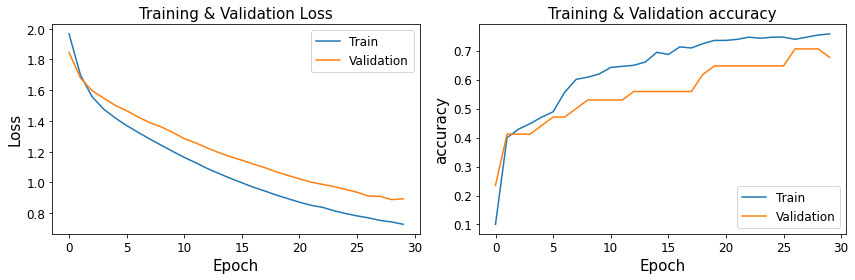

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

## Task7: (12 points)  Report the classification accuracy of the training, validation and test dataset.

In [ ]:
# Task 7.1: Derive the predicted labels for training, validation, and test set 
# from the model prediction 

train_predicted_labels = model.predict(X_train)
print(train_predicted_labels)
val_predicted_labels = model.predict(X_val)
test_predicted_labels = model.predict(X_test)

[[0.48126882 0.08700863 0.00755096 ... 0.12241045 0.03768836 0.1901152 ]
 [0.421657   0.06068329 0.00669147 ... 0.11711972 0.036841   0.2971428 ]
 [0.6886171  0.03464425 0.00483794 ... 0.08834639 0.02695936 0.1256021 ]
 ...
 [0.109818   0.46304274 0.00740172 ... 0.0534387  0.01696897 0.11617751]
 [0.9272995  0.00740826 0.00162534 ... 0.02974506 0.0088973  0.01930668]
 [0.9380437  0.0125664  0.00145042 ... 0.02858261 0.00655884 0.00654773]]


In [ ]:
train_predicted_labels_actual = np.argmax(train_predicted_labels,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual = np.argmax(val_predicted_labels,axis=1)
test_predicted_labels_actual = np.argmax(test_predicted_labels,axis=1)

y_train_actual = np.argmax(y_train_categorical, axis=1)
y_val_actual = np.argmax(y_val_categorical,axis=1)
y_test_actual = np.argmax(y_test_categorical,axis=1)
print(train_predicted_labels_actual)
# print(y_train_actual["Label"])

[0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 7 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 7 1
 7 1 0 1 0 7 1 0 0 7 0 7 0 0 1 7 7 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 1 7 0 1 0 0 1 0 0 0 1 7 0 7 1 7 0 0 0 1 1 0 0 1 1 7 7 7 0 1 1 1 7 7
 7 0 7 1 0 0 1 1 1 7 0 0 0 0 1 0 7 0 0 7 1 0 1 0 0 0 0 0 0 1 1 7 0 0 0 0 1
 0 0 0 1 1 0 1 1 7 0 0 0 7 0 1 1 0 1 0 1 1 0 7 7 1 1 0 0 1 0 0 7 1 1 1 1 1
 0 1 0 1 0 7 0 0 0 5 1 7 1 0 1 7 1 0 1 1 0 7 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 7 0 7 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 7 7 0 7 0 0 0 7 1 0 0
 0 1 0 7 0 0 1 0 0]


In [ ]:
print(train_predicted_labels_actual[0].shape,y_train.shape)

# prediction_summary = pd.DataFrame({'predicted_label':train_predicted_labels_actual, 'actual_label':y_train})
# prediction_summary

() (268, 1)


In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(np.argmax(y_train_categorical, axis=1), train_predicted_labels_actual)
acc_val = accuracy_score(np.argmax(y_val_categorical, axis=1), val_predicted_labels_actual)
acc_test = accuracy_score(np.argmax(y_test_categorical, axis=1), test_predicted_labels_actual)

print("Train set accuracy: ", acc_train)
print("Validation set accuracy: ", acc_val)
print("Test set accuracy: ", acc_test)

Train set accuracy:  0.75
Validation set accuracy:  0.6764705882352942
Test set accuracy:  0.8235294117647058


In [ ]:
prediction_summary = pd.DataFrame({'predicted_label':train_predicted_labels_actual, 'actual_label':y_train_actual})
prediction_summary

,predicted_label,actual_label
0,0,0
1,0,7
2,0,0
3,1,4
4,1,1
...,...,...
263,0,0
264,0,0
265,1,1
266,0,0


In [ ]:
actual_count_2 = len(prediction_summary[prediction_summary['actual_label'] == 4])
predicted_count_2 = len(prediction_summary[prediction_summary['predicted_label'] == 4])
print(actual_count_2, predicted_count_2)

29 0


In [ ]:
print("\nPER-CLASS ACCURACY FOR TRAIN SET\n")

for x in range(0,8):
  predicted = prediction_summary[prediction_summary['predicted_label'] == x]
  predicted_count = len(prediction_summary[prediction_summary['predicted_label'] == x])
  correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])

  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR TRAIN SET

Accuracy of digit 0 is: 0.8333333333333334 (83.333%)
Accuracy of digit 1 is: 0.7111111111111111 (71.111%)
Accuracy of digit 2 is: 0 (0%)
Accuracy of digit 3 is: 0 (0%)
Accuracy of digit 4 is: 0 (0%)
Accuracy of digit 5 is: 1 (100%)
Accuracy of digit 6 is: 0 (0%)
Accuracy of digit 7 is: 0.9230769230769231 (92.308%)


In [ ]:
prediction_summary_v = pd.DataFrame({'predicted_label':val_predicted_labels_actual, 'actual_label':y_val_actual})
prediction_summary_v

print("\nPER-CLASS ACCURACY FOR VALIDATION SET\n")

for x in range(0,8):
  predicted = prediction_summary_v[prediction_summary_v['predicted_label'] == x]
  predicted_count = len(prediction_summary_v[prediction_summary_v['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])
  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1

  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR VALIDATION SET

Accuracy of digit 0 is: 0.6666666666666666 (66.667%)
Accuracy of digit 1 is: 0.5714285714285714 (57.143%)
Accuracy of digit 2 is: 1 (100%)
Accuracy of digit 3 is: 1 (100%)
Accuracy of digit 4 is: 1 (100%)
Accuracy of digit 5 is: 1 (100%)
Accuracy of digit 6 is: 1 (100%)
Accuracy of digit 7 is: 0.8333333333333334 (83.333%)


In [ ]:
prediction_summary_t = pd.DataFrame({'predicted_label':test_predicted_labels_actual, 'actual_label':y_test_actual})
prediction_summary_t

print("\nPER-CLASS ACCURACY FOR TEST SET\n")

for x in range(0,8):
  predicted = prediction_summary_t[prediction_summary_t['predicted_label'] == x]
  predicted_count = len(prediction_summary_t[prediction_summary_t['predicted_label'] == x])
  correct_count = len(prediction_summary_t[prediction_summary_t['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])
  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR TEST SET

Accuracy of digit 0 is: 0.875 (87.5%)
Accuracy of digit 1 is: 0.7 (70.0%)
Accuracy of digit 2 is: 1 (100%)
Accuracy of digit 3 is: 1 (100%)
Accuracy of digit 4 is: 0 (0%)
Accuracy of digit 5 is: 0 (0%)
Accuracy of digit 6 is: 1 (100%)
Accuracy of digit 7 is: 1 (100%)


## Task 7.4: visualize classification confusion matrix for training, validation, and test set from the model prediction 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

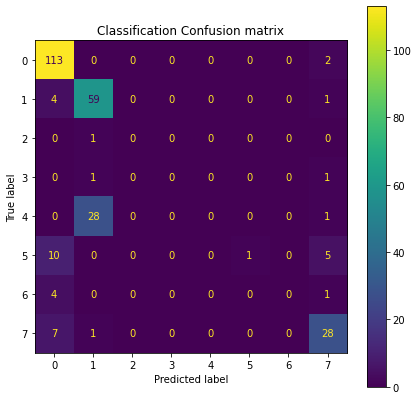

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train_actual, train_predicted_labels_actual)
plt.title("Classification Confusion matrix")
plt.show()

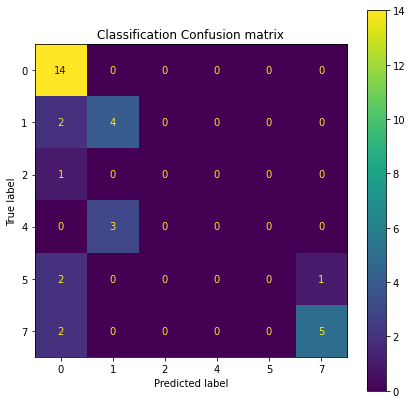

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val_actual, val_predicted_labels_actual)
plt.title("Classification Confusion matrix")
plt.show()

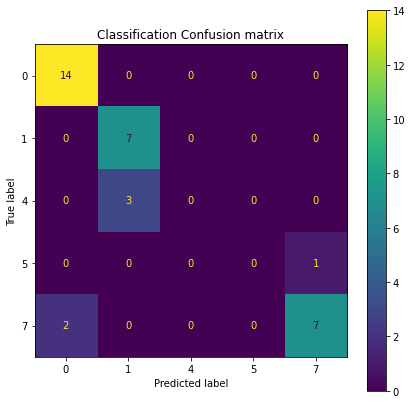

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_actual, test_predicted_labels_actual)
plt.title("Classification Confusion matrix")
plt.show()

# y_train_actual

## Task8: (9 points) Train a softmax model using Keras  

### Task 8.1: Define the softmax model using Keras, train the model on the training and validation set  (recall the course demo, slide 32)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(8,input_dim=7, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_2.build()

In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history_2 = model_2.fit(X_train,y_train_categorical, validation_data=(X_val,y_val_categorical), batch_size=5, epochs = 30)
# print(X_train.shape,y_train_categorical.shape,X_val.shape, y_val_categorical.shape)

Epoch 1/30
54/54 [==============================] - 2s 19ms/step - loss: 2.0164 - accuracy: 0.3955 - val_loss: 1.9517 - val_accuracy: 0.4118
Epoch 2/30
54/54 [==============================] - 0s 8ms/step - loss: 1.9066 - accuracy: 0.4254 - val_loss: 1.8732 - val_accuracy: 0.4118
Epoch 3/30
54/54 [==============================] - 0s 8ms/step - loss: 1.8241 - accuracy: 0.4291 - val_loss: 1.8204 - val_accuracy: 0.4118
Epoch 4/30
54/54 [==============================] - 0s 7ms/step - loss: 1.7616 - accuracy: 0.4291 - val_loss: 1.7815 - val_accuracy: 0.4118
Epoch 5/30
54/54 [==============================] - 0s 7ms/step - loss: 1.7150 - accuracy: 0.4291 - val_loss: 1.7514 - val_accuracy: 0.4118
Epoch 6/30
54/54 [==============================] - 0s 7ms/step - loss: 1.6760 - accuracy: 0.4291 - val_loss: 1.7300 - val_accuracy: 0.4118
Epoch 7/30
54/54 [==============================] - 0s 7ms/step - loss: 1.6469 - accuracy: 0.4291 - val_loss: 1.7125 - val_accuracy: 0.4118
Epoch 8/30
54/54 [=

In [ ]:
path="/content/drive/MyDrive/Models/hwrk7_m1_l0_n20_e30.h5"
tf.keras.models.save_model(model_2,path)

In [ ]:
print(train_history_2.history.keys())
print("New model: ", train_history_2.history['accuracy'])
print("Original: ", train_history.history['accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
New model:  [0.3955223858356476, 0.4253731369972229, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.4291044771671295, 0.43283581733703613, 0.44029849767684937, 0.45895522832870483, 0.4552238881587982, 0.4776119291782379, 0.4776119291782379, 0.48880597949028015, 0.4962686598300934, 0.5074626803398132, 0.5149253606796265]
Original:  [0.1007462665438652, 0.3992537260055542, 0.4291044771671295, 0.447761207818985, 0.4701492488384247, 0.48880597949028015, 0.5559701323509216, 0.6007462739944458, 0.608208954334259, 0.6194030046463013, 0.641791045665741, 0.64552241563797, 0.6492537260055542, 0.6604477763175964, 0.6940298676490784, 0.6865671873092

### Task 8.2: report the final classification accuracy of softmax model for train, validation and test

In [ ]:
train_predicted_labels_new = model_2.predict(X_train)
val_predicted_labels_new = model_2.predict(X_val)
test_predicted_labels_new = model_2.predict(X_test)

train_predicted_labels_actual_new = np.argmax(train_predicted_labels_new,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_new = np.argmax(val_predicted_labels_new,axis=1)
test_predicted_labels_actual_new = np.argmax(test_predicted_labels_new,axis=1)


In [ ]:
prediction_summary_new = pd.DataFrame({'predicted_label':train_predicted_labels_actual_new, 'actual_label':y_train_actual})
prediction_summary_new

print("\nPER-CLASS ACCURACY FOR TRAIN SET\n")

for x in range(0,8):
  predicted = prediction_summary_new[prediction_summary_new['predicted_label'] == x]
  predicted_count = len(prediction_summary_new[prediction_summary_new['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])

  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR TRAIN SET

Accuracy of digit 0 is: 0.48936170212765956 (48.936%)
Accuracy of digit 1 is: 0.7272727272727273 (72.727%)
Accuracy of digit 2 is: 1 (100%)
Accuracy of digit 3 is: 1 (100%)
Accuracy of digit 4 is: 1 (100%)
Accuracy of digit 5 is: 1 (100%)
Accuracy of digit 6 is: 1 (100%)
Accuracy of digit 7 is: 1 (100%)


In [ ]:
prediction_summary_val_new = pd.DataFrame({'predicted_label':val_predicted_labels_actual_new, 'actual_label':y_val_actual})

print("\nPER-CLASS ACCURACY FOR VALIDATION SET\n")

for x in range(0,8):
  predicted = prediction_summary_val_new[prediction_summary_val_new['predicted_label'] == x]
  predicted_count = len(prediction_summary_val_new[prediction_summary_val_new['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])
  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR VALIDATION SET

Accuracy of digit 0 is: 0.42424242424242425 (42.424%)
Accuracy of digit 1 is: 1.0 (100.0%)
Accuracy of digit 2 is: 1 (100%)
Accuracy of digit 3 is: 1 (100%)
Accuracy of digit 4 is: 1 (100%)
Accuracy of digit 5 is: 1 (100%)
Accuracy of digit 6 is: 1 (100%)
Accuracy of digit 7 is: 1 (100%)


In [ ]:
prediction_summary_test_new = pd.DataFrame({'predicted_label':test_predicted_labels_actual_new, 'actual_label':y_val_actual})

print("\nPER-CLASS ACCURACY FOR VALIDATION SET\n")

for x in range(0,8):
  predicted = prediction_summary_test_new[prediction_summary_test_new['predicted_label'] == x]
  predicted_count = len(prediction_summary_test_new[prediction_summary_test_new['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])
  if predicted_count != 0:
    accuracy_x = correct_count/predicted_count

  else: 
    accuracy_x = 0

  if accuracy_x > 1:
    accuracy_x = 1
  print("Predicted: ",predicted_count,"Actual: ",correct_count)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


PER-CLASS ACCURACY FOR VALIDATION SET

Predicted:  30 Actual:  12
Accuracy of digit 0 is: 0.4 (40.0%)
Predicted:  4 Actual:  0
Accuracy of digit 1 is: 0.0 (0.0%)
Predicted:  0 Actual:  0
Accuracy of digit 2 is: 1 (100%)
Predicted:  0 Actual:  0
Accuracy of digit 3 is: 1 (100%)
Predicted:  0 Actual:  0
Accuracy of digit 4 is: 1 (100%)
Predicted:  0 Actual:  0
Accuracy of digit 5 is: 1 (100%)
Predicted:  0 Actual:  0
Accuracy of digit 6 is: 1 (100%)
Predicted:  0 Actual:  0
Accuracy of digit 7 is: 1 (100%)


### Task 8.3: Summarize the final classification accuracy of softmax model and neural network in Task 6 for train, validation and test

In [ ]:
method = ["Neural Network", "Softmax"]
train = [accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation = [accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test = [accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_accuracy_report = pd.DataFrame({'Method':method, 'Train':train, 'Validation': validation, 'Test': test})
final_accuracy_report

,Method,Train,Validation,Test
0,Neural Network,0.750000,0.676471,0.823529
1,Softmax,0.518657,0.441176,0.470588


## Task9: (3 points) Perform Feature Scaling - Standardization on the dataset & Retrain the network using the normalized data

Hint: The mean and standard deviation must be derived from the training data only, and then use the estimated mean & std to rescale the training and test data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test.astype(np.float32))

In [ ]:
train_history_s = model.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 30)
# print(X_train.shape,y_train_categorical.shape,X_val.shape, y_val_categorical.shape)

Epoch 1/30
54/54 [==============================] - 0s 6ms/step - loss: 0.6039 - accuracy: 0.8060 - val_loss: 0.6519 - val_accuracy: 0.8529
Epoch 2/30
54/54 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.8358 - val_loss: 0.6169 - val_accuracy: 0.8235
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8507 - val_loss: 0.6004 - val_accuracy: 0.7941
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.8545 - val_loss: 0.5823 - val_accuracy: 0.7941
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.8545 - val_loss: 0.5686 - val_accuracy: 0.8235
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8657 - val_loss: 0.5631 - val_accuracy: 0.8529
Epoch 7/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8769 - val_loss: 0.5528 - val_accuracy: 0.8529
Epoch 8/30
54/54 [==

In [ ]:
path="/content/drive/MyDrive/Models/hwrk7_m1_l1_n20_e30_retrained.h5"
tf.keras.models.save_model(model,path)

In [ ]:
train_predicted_labels_s = model.predict(X_train_s)
val_predicted_labels_s = model.predict(X_val_s)
test_predicted_labels_s = model.predict(X_test_s)

train_predicted_labels_actual_s = np.argmax(train_predicted_labels_s,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_s = np.argmax(val_predicted_labels_s,axis=1)
test_predicted_labels_actual_s = np.argmax(test_predicted_labels_s,axis=1)


In [ ]:
methods = ["Neural Network (normalized) ", "Neural Network",  "Softmax"]
train_ = [accuracy_score(y_train_actual,train_predicted_labels_actual_s), accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_accuracy_report = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_accuracy_report

,Method,Train,Validation,Test
0,Neural Network (normalized),0.895522,0.823529,0.970588
1,Neural Network,0.750000,0.676471,0.823529
2,Softmax,0.518657,0.441176,0.470588


In [ ]:
train_history_2_s = model_2.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 30)
# print(X_train.shape,y_train_categorical.shape,X_val.shape, y_val_categorical.shape)

Epoch 1/30
54/54 [==============================] - 1s 9ms/step - loss: 1.5465 - accuracy: 0.5224 - val_loss: 1.6550 - val_accuracy: 0.4706
Epoch 2/30
54/54 [==============================] - 0s 6ms/step - loss: 1.3029 - accuracy: 0.6642 - val_loss: 1.4435 - val_accuracy: 0.6471
Epoch 3/30
54/54 [==============================] - 0s 5ms/step - loss: 1.1385 - accuracy: 0.7425 - val_loss: 1.3059 - val_accuracy: 0.6765
Epoch 4/30
54/54 [==============================] - 0s 6ms/step - loss: 1.0258 - accuracy: 0.7612 - val_loss: 1.2010 - val_accuracy: 0.7353
Epoch 5/30
54/54 [==============================] - 0s 6ms/step - loss: 0.9431 - accuracy: 0.7761 - val_loss: 1.1185 - val_accuracy: 0.7353
Epoch 6/30
54/54 [==============================] - 0s 6ms/step - loss: 0.8800 - accuracy: 0.7761 - val_loss: 1.0588 - val_accuracy: 0.7353
Epoch 7/30
54/54 [==============================] - 0s 6ms/step - loss: 0.8301 - accuracy: 0.7687 - val_loss: 1.0033 - val_accuracy: 0.7353
Epoch 8/30
54/54 [==

In [ ]:
path="/content/drive/MyDrive/Models/hwrk7_m1_l0_n20_e30_retrained.h5"
tf.keras.models.save_model(model_2,path)

In [ ]:
train_predicted_labels_new_s = model_2.predict(X_train_s)
val_predicted_labels_new_s = model_2.predict(X_val_s)
test_predicted_labels_new_s = model_2.predict(X_test_s)

train_predicted_labels_actual_new_s = np.argmax(train_predicted_labels_new_s,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_new_s = np.argmax(val_predicted_labels_new_s,axis=1)
test_predicted_labels_actual_new_s = np.argmax(test_predicted_labels_new_s,axis=1)


In [ ]:
methods = ["Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]
train_ = [accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report

,Method,Train,Validation,Test
0,Neural Network (normalized),0.895522,0.823529,0.970588
1,Neural Network,0.750000,0.676471,0.823529
2,Softmax (normalized),0.876866,0.823529,0.941176
3,Softmax,0.518657,0.441176,0.470588


Massive improvement observed after applying feature scaling.

## Task11: (4 points) increase model complexity by adding more hidden layers and nodes (i.e., 4 hidden layers, 50 hidden nodes, epoch 50). Summarize the results of new model, and compare with previous results. 

In [ ]:
model_v2 = Sequential()
model_v2.add(Dense(50,input_dim=7, activation='tanh'))
model_v2.add(Dense(50,activation='tanh'))
model_v2.add(Dense(50,activation='tanh'))
model_v2.add(Dense(50,activation='tanh'))
model_v2.add(Dense(8, activation='softmax'))
model_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                400       
                                                                 
 dense_28 (Dense)            (None, 50)                2550      
                                                                 
 dense_29 (Dense)            (None, 50)                2550      
                                                                 
 dense_30 (Dense)            (None, 50)                2550      
                                                                 
 dense_31 (Dense)            (None, 8)                 408       
                                                                 
Total params: 8,458
Trainable params: 8,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history_v2 = model_v2.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 50)

Epoch 1/50
54/54 [==============================] - 1s 7ms/step - loss: 0.9370 - accuracy: 0.7351 - val_loss: 0.5489 - val_accuracy: 0.7647
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8507 - val_loss: 0.4840 - val_accuracy: 0.8235
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.8433 - val_loss: 0.4076 - val_accuracy: 0.8235
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8657 - val_loss: 0.4960 - val_accuracy: 0.8235
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8955 - val_loss: 0.3954 - val_accuracy: 0.8235
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.8731 - val_loss: 0.5206 - val_accuracy: 0.8235
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8619 - val_loss: 0.4664 - val_accuracy: 0.8235
Epoch 8/50
54/54 [==

In [ ]:
path="/content/drive/MyDrive/Models/hwrk7_m1_l4_n50_e50.h5"
tf.keras.models.save_model(model_v2,path)

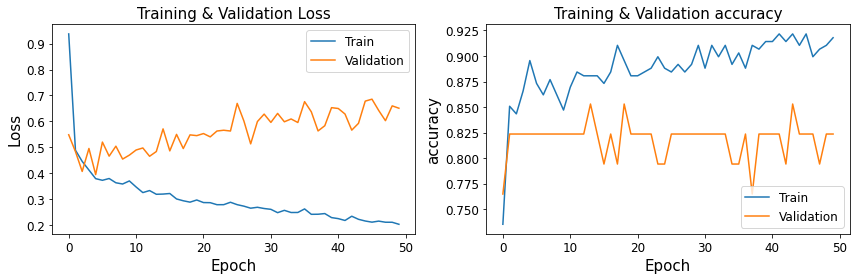

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_v2.history['loss'], label='Train')
plt.plot(train_history_v2.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_v2.history['accuracy'], label='Train')
plt.plot(train_history_v2.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_predicted_labels_n50_e50_s = model_v2.predict(X_train_s)
val_predicted_labels_n50_e50_s = model_v2.predict(X_val_s)
test_predicted_labels_n50_e50_s = model_v2.predict(X_test_s)

train_predicted_labels_actual_n50_e50_s = np.argmax(train_predicted_labels_n50_e50_s,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n50_e50_s = np.argmax(val_predicted_labels_n50_e50_s,axis=1)
test_predicted_labels_actual_n50_e50_s = np.argmax(test_predicted_labels_n50_e50_s,axis=1)


In [ ]:
methods = ["Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]
train_ = [accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
1,Neural Network (normalized),0.895522,0.823529,0.970588
2,Neural Network,0.750000,0.676471,0.823529
3,Softmax (normalized),0.876866,0.823529,0.941176
4,Softmax,0.518657,0.441176,0.470588


## Task12: (10 points)  Practice the following techniques to see if any further improvement can be achieved. Summarize all results into tables.

In [ ]:
# add more number of layers and nodes  (2 points)

model_v2 = Sequential()
model_v2.add(Dense(60,input_dim=7, activation='tanh'))
model_v2.add(Dense(60,activation='tanh'))
model_v2.add(Dense(60,activation='relu'))
model_v2.add(Dense(60,activation='relu'))
model_v2.add(Dense(60,activation='relu'))
model_v2.add(Dense(60,activation='tanh'))
model_v2.add(Dense(8, activation='softmax'))
model_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                480       
                                                                 
 dense_21 (Dense)            (None, 60)                3660      
                                                                 
 dense_22 (Dense)            (None, 60)                3660      
                                                                 
 dense_23 (Dense)            (None, 60)                3660      
                                                                 
 dense_24 (Dense)            (None, 60)                3660      
                                                                 
 dense_25 (Dense)            (None, 60)                3660      
                                                                 
 dense_26 (Dense)            (None, 8)               

In [ ]:
train_history_v2 = model_v2.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 50)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e50_retrained.h5"
tf.keras.models.save_model(model_v2,path)

Epoch 1/50
54/54 [==============================] - 1s 8ms/step - loss: 1.1716 - accuracy: 0.6493 - val_loss: 0.6299 - val_accuracy: 0.7353
Epoch 2/50
54/54 [==============================] - 0s 8ms/step - loss: 0.5527 - accuracy: 0.8022 - val_loss: 0.6160 - val_accuracy: 0.7941
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.8470 - val_loss: 0.4827 - val_accuracy: 0.8529
Epoch 4/50
54/54 [==============================] - 0s 7ms/step - loss: 0.4005 - accuracy: 0.8657 - val_loss: 0.4123 - val_accuracy: 0.8824
Epoch 5/50
54/54 [==============================] - 0s 7ms/step - loss: 0.3941 - accuracy: 0.8657 - val_loss: 0.5091 - val_accuracy: 0.8235
Epoch 6/50
54/54 [==============================] - 0s 7ms/step - loss: 0.3927 - accuracy: 0.8657 - val_loss: 0.4791 - val_accuracy: 0.8529
Epoch 7/50
54/54 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.8769 - val_loss: 0.5881 - val_accuracy: 0.8235
Epoch 8/50
54/54 [==

In [ ]:
train_predicted_labels_n60_e50_s= model_v2.predict(X_train_s)
val_predicted_labels_n60_e50_s = model_v2.predict(X_val_s)
test_predicted_labels_n60_e50_s = model_v2.predict(X_test_s)

train_predicted_labels_actual_n60_e50_s = np.argmax(train_predicted_labels_n60_e50_s,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e50_s = np.argmax(val_predicted_labels_n60_e50_s,axis=1)
test_predicted_labels_actual_n60_e50_s = np.argmax(test_predicted_labels_n60_e50_s,axis=1)

In [ ]:
methods = ["Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

nn6050_t = accuracy_score(y_train_actual,train_predicted_labels_actual_n60_e50_s)
nn6050_v = accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s)
nn6050_s = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e50_s)


train_ = [nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
1,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
2,Neural Network (normalized),0.895522,0.823529,0.970588
3,Neural Network,0.750000,0.676471,0.823529
4,Softmax (normalized),0.876866,0.823529,0.941176
5,Softmax,0.518657,0.441176,0.470588


In [ ]:
def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh'))
  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(n_neurons, activation = 'relu'))
    else:
      model.add(Dense(n_neurons, activation = 'tanh'))

  model.add(Dense(8, activation = 'softmax'))
  return model


In [ ]:
# Add early stop and increase the number of epoch  (2 points)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]


model_v3 = build_model(n_layers=6,n_neurons=60)
model_v3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 60)                480       
                                                                 
 dense_79 (Dense)            (None, 60)                3660      
                                                                 
 dense_80 (Dense)            (None, 60)                3660      
                                                                 
 dense_81 (Dense)            (None, 60)                3660      
                                                                 
 dense_82 (Dense)            (None, 60)                3660      
                                                                 
 dense_83 (Dense)            (None, 60)                3660      
                                                                 
 dense_84 (Dense)            (None, 8)               

In [ ]:
train_history_v3 = model_v3.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop.h5"
tf.keras.models.save_model(model_v3,path)

Epoch 1/60
54/54 [==============================] - 1s 6ms/step - loss: 1.2503 - accuracy: 0.5858 - val_loss: 0.7213 - val_accuracy: 0.7353
Epoch 2/60
54/54 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.7948 - val_loss: 0.5674 - val_accuracy: 0.7647
Epoch 3/60
54/54 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.8358 - val_loss: 0.4936 - val_accuracy: 0.8529
Epoch 4/60
54/54 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8545 - val_loss: 0.5185 - val_accuracy: 0.7941
Epoch 5/60
54/54 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8619 - val_loss: 0.5795 - val_accuracy: 0.8235
Epoch 6/60
54/54 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8358 - val_loss: 0.5438 - val_accuracy: 0.7941
Epoch 7/60
54/54 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.8769 - val_loss: 0.6481 - val_accuracy: 0.8235
Epoch 8/60
54/54 [==

In [ ]:
train_predicted_labels_n60_e60_es= model_v3.predict(X_train_s)
val_predicted_labels_n60_e60_es = model_v3.predict(X_val_s)
test_predicted_labels_n60_e60_es = model_v3.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es = np.argmax(train_predicted_labels_n60_e60_es,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es = np.argmax(val_predicted_labels_n60_e60_es,axis=1)
test_predicted_labels_actual_n60_e60_es = np.argmax(test_predicted_labels_n60_e60_es,axis=1)

methods = ["Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

nn6060_t = accuracy_score(y_train_actual,train_predicted_labels_actual_n60_e50_s)
nn6060_v = accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s)
nn6060_s = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e50_s)

train_ = [nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
1,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
2,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
3,Neural Network (normalized),0.895522,0.823529,0.970588
4,Neural Network,0.750000,0.676471,0.823529
5,Softmax (normalized),0.876866,0.823529,0.941176
6,Softmax,0.518657,0.441176,0.470588


In [ ]:
from keras.layers import Flatten,BatchNormalization,Dropout


# Add batch normalization layers (2 points)
def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh'))
  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(n_neurons, activation = 'relu'))
    else:
      model.add(Dense(n_neurons, activation = 'tanh'))
    model.add(BatchNormalization())

  model.add(Dense(8, activation = 'softmax'))
  return model


model_v4 = build_model(n_layers=6,n_neurons=60)
model_v4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 60)                480       
                                                                 
 dense_86 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization (BatchN  (None, 60)               240       
 ormalization)                                                   
                                                                 
 dense_87 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization_1 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                                 
 dense_88 (Dense)            (None, 60)              

In [ ]:
train_history_v4 = model_v4.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop_batchnorm.h5"
tf.keras.models.save_model(model_v4,path)

Epoch 1/60
54/54 [==============================] - 4s 18ms/step - loss: 1.7889 - accuracy: 0.3881 - val_loss: 1.6672 - val_accuracy: 0.6765
Epoch 2/60
54/54 [==============================] - 1s 10ms/step - loss: 0.9795 - accuracy: 0.7164 - val_loss: 1.1822 - val_accuracy: 0.7647
Epoch 3/60
54/54 [==============================] - 1s 11ms/step - loss: 0.8894 - accuracy: 0.7537 - val_loss: 0.8957 - val_accuracy: 0.7941
Epoch 4/60
54/54 [==============================] - 1s 11ms/step - loss: 0.9178 - accuracy: 0.7463 - val_loss: 0.7125 - val_accuracy: 0.8235
Epoch 5/60
54/54 [==============================] - 1s 11ms/step - loss: 0.8695 - accuracy: 0.7239 - val_loss: 0.6156 - val_accuracy: 0.8529
Epoch 6/60
54/54 [==============================] - 1s 9ms/step - loss: 0.8409 - accuracy: 0.7500 - val_loss: 0.5877 - val_accuracy: 0.8529
Epoch 7/60
54/54 [==============================] - 1s 11ms/step - loss: 0.7827 - accuracy: 0.7351 - val_loss: 0.5346 - val_accuracy: 0.8235
Epoch 8/60
54/

In [ ]:
train_predicted_labels_n60_e60_es_bn= model_v4.predict(X_train_s)
val_predicted_labels_n60_e60_es_bn = model_v4.predict(X_val_s)
test_predicted_labels_n60_e60_es_bn = model_v4.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es_bn = np.argmax(train_predicted_labels_n60_e60_es_bn,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es_bn = np.argmax(val_predicted_labels_n60_e60_es_bn,axis=1)
test_predicted_labels_actual_n60_e60_es_bn = np.argmax(test_predicted_labels_n60_e60_es_bn,axis=1)

methods = ["NN_n60_e60_earlystop_batchnorm (normalized)","Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

nn6060_bn_t = accuracy_score(y_train_actual,train_predicted_labels_actual_n60_e60_es_bn)
nn6060_bn_v = accuracy_score(y_val_actual, val_predicted_labels_actual_n60_e60_es_bn)
nn6060_bn_s = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e60_es_bn)

train_ = [nn6060_bn_t,nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [nn6060_bn_v,nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [nn6060_bn_s,nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,NN_n60_e60_earlystop_batchnorm (normalized),0.895522,0.852941,0.911765
1,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
2,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
3,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
4,Neural Network (normalized),0.895522,0.823529,0.970588
5,Neural Network,0.750000,0.676471,0.823529
6,Softmax (normalized),0.876866,0.823529,0.941176
7,Softmax,0.518657,0.441176,0.470588


In [ ]:
# Add Dropout layers  (2 points)
def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh', kernel_regularizer='l2'))
  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(n_neurons, activation = 'relu', kernel_regularizer='l2'))
    else:
      model.add(Dense(n_neurons, activation = 'tanh', kernel_regularizer='l2'))

    model.add(BatchNormalization()) # add normalization here

  model.add(Dense(8, activation = 'softmax'))
  return model


model_v5 = build_model(n_layers=6,n_neurons=60)
model_v5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v5.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 60)                480       
                                                                 
 dense_93 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization_5 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                                 
 dense_94 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization_6 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                                 
 dense_95 (Dense)            (None, 60)              

In [ ]:
train_history_v5 = model_v5.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop_batchnorm_reg.h5"
tf.keras.models.save_model(model_v5,path)

Epoch 1/60
54/54 [==============================] - 2s 12ms/step - loss: 4.4676 - accuracy: 0.5373 - val_loss: 4.7505 - val_accuracy: 0.6471
Epoch 2/60
54/54 [==============================] - 0s 9ms/step - loss: 4.0520 - accuracy: 0.6978 - val_loss: 4.3151 - val_accuracy: 0.7353
Epoch 3/60
54/54 [==============================] - 0s 8ms/step - loss: 4.0075 - accuracy: 0.7015 - val_loss: 3.9397 - val_accuracy: 0.7353
Epoch 4/60
54/54 [==============================] - 0s 7ms/step - loss: 3.7571 - accuracy: 0.7612 - val_loss: 3.6327 - val_accuracy: 0.7647
Epoch 5/60
54/54 [==============================] - 0s 7ms/step - loss: 3.7076 - accuracy: 0.7313 - val_loss: 3.4419 - val_accuracy: 0.7647
Epoch 6/60
54/54 [==============================] - 0s 7ms/step - loss: 3.5949 - accuracy: 0.7425 - val_loss: 3.2824 - val_accuracy: 0.8824
Epoch 7/60
54/54 [==============================] - 0s 7ms/step - loss: 3.5235 - accuracy: 0.7276 - val_loss: 3.2309 - val_accuracy: 0.8235
Epoch 8/60
54/54 [=

In [ ]:
train_predicted_labels_n60_e60_es_bn_reg= model_v5.predict(X_train_s)
val_predicted_labels_n60_e60_es_bn_reg = model_v5.predict(X_val_s)
test_predicted_labels_n60_e60_es_bn_reg = model_v5.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es_bn_reg = np.argmax(train_predicted_labels_n60_e60_es_bn_reg,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es_bn_reg = np.argmax(val_predicted_labels_n60_e60_es_bn_reg,axis=1)
test_predicted_labels_actual_n60_e60_es_bn_reg = np.argmax(test_predicted_labels_n60_e60_es_bn_reg,axis=1)

methods = ["NN_n60_e60_es_bn_regularized (normalized)","NN_n60_e60_earlystop_batchnorm (normalized)","Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

nn6060_bn_t_reg = accuracy_score(y_train_actual,train_predicted_labels_actual_n60_e60_es_bn_reg)
nn6060_bn_v_reg = accuracy_score(y_val_actual, val_predicted_labels_actual_n60_e60_es_bn_reg)
nn6060_bn_s_reg = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e60_es_bn_reg)

train_ = [nn6060_bn_t_reg,nn6060_bn_t,nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [nn6060_bn_v_reg,nn6060_bn_v,nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [nn6060_bn_s_reg,nn6060_bn_s,nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,NN_n60_e60_es_bn_regularized (normalized),0.861940,0.794118,0.970588
1,NN_n60_e60_earlystop_batchnorm (normalized),0.895522,0.852941,0.911765
2,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
3,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
4,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
5,Neural Network (normalized),0.895522,0.823529,0.970588
6,Neural Network,0.750000,0.676471,0.823529
7,Softmax (normalized),0.876866,0.823529,0.941176
8,Softmax,0.518657,0.441176,0.470588


In [ ]:
# Add Dropout layers  (2 points)

def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh', kernel_regularizer='l2'))
  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(n_neurons, activation = 'relu', kernel_regularizer='l2'))
    else:
      model.add(Dense(n_neurons, activation = 'tanh', kernel_regularizer='l2'))

    model.add(BatchNormalization()) # add normalization here
    model.add(Dropout(0.2))

  model.add(Dense(8, activation = 'softmax'))
  return model


model_v6 = build_model(n_layers=6,n_neurons=60)
model_v6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v6.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 60)                480       
                                                                 
 dense_100 (Dense)           (None, 60)                3660      
                                                                 
 batch_normalization_10 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_101 (Dense)           (None, 60)                3660      
                                                                 
 batch_normalization_11 (Bat  (None, 60)               240       
 chNormalization)                                    

In [ ]:
train_history_v6 = model_v6.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop_batchnorm_reg_dropout.h5"
tf.keras.models.save_model(model_v6,path)

Epoch 1/60
54/54 [==============================] - 2s 12ms/step - loss: 5.1425 - accuracy: 0.3396 - val_loss: 4.5751 - val_accuracy: 0.5588
Epoch 2/60
54/54 [==============================] - 0s 7ms/step - loss: 4.3393 - accuracy: 0.6157 - val_loss: 4.0743 - val_accuracy: 0.6471
Epoch 3/60
54/54 [==============================] - 0s 7ms/step - loss: 4.4889 - accuracy: 0.5746 - val_loss: 3.8100 - val_accuracy: 0.7353
Epoch 4/60
54/54 [==============================] - 0s 7ms/step - loss: 4.2581 - accuracy: 0.6119 - val_loss: 3.6214 - val_accuracy: 0.7941
Epoch 5/60
54/54 [==============================] - 0s 8ms/step - loss: 4.1716 - accuracy: 0.6269 - val_loss: 3.5316 - val_accuracy: 0.7353
Epoch 6/60
54/54 [==============================] - 0s 7ms/step - loss: 4.1478 - accuracy: 0.6194 - val_loss: 3.4471 - val_accuracy: 0.8529
Epoch 7/60
54/54 [==============================] - 0s 7ms/step - loss: 3.8779 - accuracy: 0.6791 - val_loss: 3.3695 - val_accuracy: 0.8235
Epoch 8/60
54/54 [=

In [ ]:
t_p_labels_n60_e60_es_bn_reg_dr = model_v6.predict(X_train_s)
v_p_labels_n60_e60_es_bn_reg_dr = model_v6.predict(X_val_s)
s_p_labels_n60_e60_es_bn_reg_dr = model_v6.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(t_p_labels_n60_e60_es_bn_reg_dr,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(v_p_labels_n60_e60_es_bn_reg_dr,axis=1)
test_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(s_p_labels_n60_e60_es_bn_reg_dr,axis=1)

methods = ["NN_n60_e60_es_bn_reg_dropout (normalized)","NN_n60_e60_es_bn_regularized (normalized)","NN_n60_e60_earlystop_batchnorm (normalized)","Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

nn6060_bn_t_reg_dr = accuracy_score(y_train_actual, train_predicted_labels_actual_n60_e60_es_bn_reg_dr)
nn6060_bn_v_reg_dr = accuracy_score(y_val_actual, val_predicted_labels_actual_n60_e60_es_bn_reg_dr)
nn6060_bn_s_reg_dr = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e60_es_bn_reg_dr)

train_ = [nn6060_bn_t_reg_dr, nn6060_bn_t_reg,nn6060_bn_t,nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [nn6060_bn_v_reg_dr, nn6060_bn_v_reg,nn6060_bn_v,nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [nn6060_bn_s_reg_dr, nn6060_bn_s_reg,nn6060_bn_s,nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,NN_n60_e60_es_bn_reg_dropout (normalized),0.884328,0.852941,0.882353
1,NN_n60_e60_es_bn_regularized (normalized),0.861940,0.794118,0.970588
2,NN_n60_e60_earlystop_batchnorm (normalized),0.895522,0.852941,0.911765
3,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
4,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
5,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
6,Neural Network (normalized),0.895522,0.823529,0.970588
7,Neural Network,0.750000,0.676471,0.823529
8,Softmax (normalized),0.876866,0.823529,0.941176
9,Softmax,0.518657,0.441176,0.470588


## Task13: (5points)  Summarize your results/observations, and discuss any further trials you would like to continue to work on. (no less than 50 words)

Feature scaling of the datasets vastly improved performances of the models. It seems like this is a very crucial step and should not be missed.

For this particular dataset, choosing activation function tanh for hidden layers produced better results than relu.

It was also worthy of note that increasing the number of hidden layers and hidden nodes per layer also generally improved performance.

Adding early stop did not improve performance so much, possibly because the patience value was high. 

Batch normalization and regularization, however, also made a big difference to the performance of the model.

For additional testing, we will attempt to use the pyramid-style node configuration for hidden layers with lower layers having higher number of nodes and then decreasingly less number of nodes as we go higher.

In [ ]:
#implememt pyramid configuration of numbers of hidden nodes

# Add Dropout layers  (2 points)

def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh', kernel_regularizer='l2'))

  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(10 * (n_layers-i), activation = 'relu', kernel_regularizer='l2'))
    else:
      model.add(Dense(10 * (n_layers-i), activation = 'tanh', kernel_regularizer='l2'))

    model.add(BatchNormalization()) # add normalization here
    model.add(Dropout(0.2))

  model.add(Dense(8, activation = 'softmax'))
  return model


model_v7 = build_model(n_layers=6,n_neurons=60)
model_v7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v7.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 60)                480       
                                                                 
 dense_107 (Dense)           (None, 60)                3660      
                                                                 
 batch_normalization_15 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_108 (Dense)           (None, 50)                3050      
                                                                 
 batch_normalization_16 (Bat  (None, 50)               200       
 chNormalization)                                    

In [ ]:
train_history_v7 = model_v7.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop_batchnorm_reg_dropout_custom.h5"
tf.keras.models.save_model(model_v7,path)

Epoch 1/60
54/54 [==============================] - 2s 12ms/step - loss: 4.5452 - accuracy: 0.3022 - val_loss: 3.9550 - val_accuracy: 0.4706
Epoch 2/60
54/54 [==============================] - 0s 7ms/step - loss: 3.9519 - accuracy: 0.4142 - val_loss: 3.5879 - val_accuracy: 0.5588
Epoch 3/60
54/54 [==============================] - 0s 7ms/step - loss: 3.8198 - accuracy: 0.4851 - val_loss: 3.3001 - val_accuracy: 0.7647
Epoch 4/60
54/54 [==============================] - 0s 7ms/step - loss: 3.6188 - accuracy: 0.5410 - val_loss: 3.1158 - val_accuracy: 0.7353
Epoch 5/60
54/54 [==============================] - 0s 7ms/step - loss: 3.5109 - accuracy: 0.6119 - val_loss: 2.9815 - val_accuracy: 0.7353
Epoch 6/60
54/54 [==============================] - 0s 7ms/step - loss: 3.6229 - accuracy: 0.5970 - val_loss: 2.9211 - val_accuracy: 0.7353
Epoch 7/60
54/54 [==============================] - 0s 7ms/step - loss: 3.4319 - accuracy: 0.5970 - val_loss: 2.8427 - val_accuracy: 0.7353
Epoch 8/60
54/54 [=

In [ ]:
c_t_p_labels_n60_e60_es_bn_reg_dr = model_v7.predict(X_train_s)
c_v_p_labels_n60_e60_es_bn_reg_dr = model_v7.predict(X_val_s)
c_s_p_labels_n60_e60_es_bn_reg_dr = model_v7.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_t_p_labels_n60_e60_es_bn_reg_dr,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_v_p_labels_n60_e60_es_bn_reg_dr,axis=1)
test_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_s_p_labels_n60_e60_es_bn_reg_dr,axis=1)

methods = ["NN pyramid neuron structure","NN_n60_e60_es_bn_reg_dropout (normalized)","NN_n60_e60_es_bn_regularized (normalized)","NN_n60_e60_earlystop_batchnorm (normalized)","Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

c_nn6060_bn_t_reg_dr = accuracy_score(y_train_actual, train_predicted_labels_actual_n60_e60_es_bn_reg_dr)
c_nn6060_bn_v_reg_dr = accuracy_score(y_val_actual, val_predicted_labels_actual_n60_e60_es_bn_reg_dr)
c_nn6060_bn_s_reg_dr = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e60_es_bn_reg_dr)

train_ = [c_nn6060_bn_t_reg_dr, nn6060_bn_t_reg_dr, nn6060_bn_t_reg,nn6060_bn_t,nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [c_nn6060_bn_v_reg_dr, nn6060_bn_v_reg_dr, nn6060_bn_v_reg,nn6060_bn_v,nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [c_nn6060_bn_s_reg_dr, nn6060_bn_s_reg_dr, nn6060_bn_s_reg,nn6060_bn_s,nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,NN pyramid neuron structure,0.876866,0.852941,0.911765
1,NN_n60_e60_es_bn_reg_dropout (normalized),0.884328,0.852941,0.882353
2,NN_n60_e60_es_bn_regularized (normalized),0.861940,0.794118,0.970588
3,NN_n60_e60_earlystop_batchnorm (normalized),0.895522,0.852941,0.911765
4,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
5,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
6,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
7,Neural Network (normalized),0.895522,0.823529,0.970588
8,Neural Network,0.750000,0.676471,0.823529
9,Softmax (normalized),0.876866,0.823529,0.941176


In [ ]:
#implememt pyramid configuration of numbers of hidden nodes without Dropout

def build_model(n_layers = 6, n_neurons = 500):
  model = Sequential() # create Sequential model
  model.add(Dense(60,input_dim=7, activation='tanh', kernel_regularizer='l2'))

  for i in range(n_layers-1):
    if i%2 == 0:
      model.add(Dense(10 * (n_layers-i), activation = 'relu', kernel_regularizer='l2'))
    else:
      model.add(Dense(10 * (n_layers-i), activation = 'tanh', kernel_regularizer='l2'))

    model.add(BatchNormalization()) # add normalization here

  model.add(Dense(8, activation = 'softmax'))
  return model


model_v8 = build_model(n_layers=6,n_neurons=60)
model_v8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v8.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 60)                480       
                                                                 
 dense_121 (Dense)           (None, 60)                3660      
                                                                 
 batch_normalization_25 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 dense_122 (Dense)           (None, 50)                3050      
                                                                 
 batch_normalization_26 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 40)              

In [ ]:
train_history_v8 = model_v8.fit(X_train_s,y_train_categorical, validation_data=(X_val_s,y_val_categorical), batch_size=5, epochs = 60)

path="/content/drive/MyDrive/Models/hwrk7_m1_l6_n60_e60_earlystop_batchnorm_reg_custom.h5"
tf.keras.models.save_model(model_v8,path)

Epoch 1/60
54/54 [==============================] - 2s 13ms/step - loss: 4.2022 - accuracy: 0.3545 - val_loss: 3.9123 - val_accuracy: 0.5882
Epoch 2/60
54/54 [==============================] - 0s 7ms/step - loss: 3.5594 - accuracy: 0.6007 - val_loss: 3.4895 - val_accuracy: 0.6176
Epoch 3/60
54/54 [==============================] - 0s 6ms/step - loss: 3.3661 - accuracy: 0.6679 - val_loss: 3.1996 - val_accuracy: 0.7353
Epoch 4/60
54/54 [==============================] - 0s 7ms/step - loss: 3.3212 - accuracy: 0.6343 - val_loss: 2.9699 - val_accuracy: 0.7059
Epoch 5/60
54/54 [==============================] - 0s 7ms/step - loss: 3.1694 - accuracy: 0.6567 - val_loss: 2.8710 - val_accuracy: 0.7647
Epoch 6/60
54/54 [==============================] - 0s 7ms/step - loss: 3.0151 - accuracy: 0.7351 - val_loss: 2.8061 - val_accuracy: 0.7647
Epoch 7/60
54/54 [==============================] - 0s 7ms/step - loss: 3.0034 - accuracy: 0.7201 - val_loss: 2.7359 - val_accuracy: 0.6765
Epoch 8/60
54/54 [=

In [ ]:
c_t_p_labels_n60_e60_es_bn_reg = model_v8.predict(X_train_s)
c_v_p_labels_n60_e60_es_bn_reg = model_v8.predict(X_val_s)
c_s_p_labels_n60_e60_es_bn_reg = model_v8.predict(X_test_s)

train_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_t_p_labels_n60_e60_es_bn_reg,axis=1) # find the index of column which has maximum value in each row
val_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_v_p_labels_n60_e60_es_bn_reg,axis=1)
test_predicted_labels_actual_n60_e60_es_bn_reg_dr = np.argmax(c_s_p_labels_n60_e60_es_bn_reg,axis=1)

methods = ["NN pyramid neuron structure (no dropout)","NN pyramid neuron structure","NN_n60_e60_es_bn_reg_dropout (normalized)","NN_n60_e60_es_bn_regularized (normalized)","NN_n60_e60_earlystop_batchnorm (normalized)","Neural_Network_n60_e60_earlystop (normalized)","Neural_Network_n60_e50 (normalized)","Neural Network_n50_e50 (normalized) ","Neural Network (normalized) ", "Neural Network", "Softmax (normalized) ", "Softmax"]

c_nn6060_bn_t_reg = accuracy_score(y_train_actual, train_predicted_labels_actual_n60_e60_es_bn_reg_dr)
c_nn6060_bn_v_reg = accuracy_score(y_val_actual, val_predicted_labels_actual_n60_e60_es_bn_reg_dr)
c_nn6060_bn_s_reg = accuracy_score(y_test_actual, test_predicted_labels_actual_n60_e60_es_bn_reg_dr)

train_ = [c_nn6060_bn_t_reg,c_nn6060_bn_t_reg_dr, nn6060_bn_t_reg_dr, nn6060_bn_t_reg,nn6060_bn_t,nn6060_t,nn6050_t,accuracy_score(y_train_actual,train_predicted_labels_actual_n50_e50_s),accuracy_score(y_train_actual,train_predicted_labels_actual_s),accuracy_score(y_train_actual,train_predicted_labels_actual), accuracy_score(y_train_actual,train_predicted_labels_actual_new_s), accuracy_score(y_train_actual, train_predicted_labels_actual_new)]
validation_ = [c_nn6060_bn_v_reg,c_nn6060_bn_v_reg_dr, nn6060_bn_v_reg_dr, nn6060_bn_v_reg,nn6060_bn_v,nn6060_v,nn6050_v,accuracy_score(y_val_actual, val_predicted_labels_actual_n50_e50_s), accuracy_score(y_val_actual, val_predicted_labels_actual_s), accuracy_score(y_val_actual, val_predicted_labels_actual), accuracy_score(y_val_actual, val_predicted_labels_actual_new_s), accuracy_score(y_val_actual, val_predicted_labels_actual_new)]
test_ = [c_nn6060_bn_s_reg,c_nn6060_bn_s_reg_dr, nn6060_bn_s_reg_dr, nn6060_bn_s_reg,nn6060_bn_s,nn6060_s,nn6050_s,accuracy_score(y_test_actual, test_predicted_labels_actual_n50_e50_s), accuracy_score(y_test_actual, test_predicted_labels_actual_s), accuracy_score(y_test_actual, test_predicted_labels_actual), accuracy_score(y_test_actual, test_predicted_labels_actual_new_s), accuracy_score(y_test_actual, test_predicted_labels_actual_new)]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Train':train_, 'Validation': validation_, 'Test': test_})
final_final_accuracy_report_

,Method,Train,Validation,Test
0,NN pyramid neuron structure (no dropout),0.876866,0.823529,0.882353
1,NN pyramid neuron structure,0.876866,0.852941,0.911765
2,NN_n60_e60_es_bn_reg_dropout (normalized),0.884328,0.852941,0.882353
3,NN_n60_e60_es_bn_regularized (normalized),0.861940,0.794118,0.970588
4,NN_n60_e60_earlystop_batchnorm (normalized),0.895522,0.852941,0.911765
5,Neural_Network_n60_e60_earlystop (normalized),0.966418,0.823529,0.823529
6,Neural_Network_n60_e50 (normalized),0.966418,0.823529,0.823529
7,Neural Network_n50_e50 (normalized),0.936567,0.823529,0.852941
8,Neural Network (normalized),0.895522,0.823529,0.970588
9,Neural Network,0.750000,0.676471,0.823529


# Part III (15 points) Build neural network pipeline for your final project. Report your progress on the final project

In this part, you need to include the neural network method into your final project, and report the latest progress for the final project. 

Note: You do not need to perform parameter tuning on neural network in this assignment. But you should at least train one neural network model on your final project dataset.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

# fer2013 = pd.read_csv('/content/drive/MyDrive/Data/fer2013.csv', header=None, delim_whitespace=True)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def load_fer2013(path='/content/drive/MyDrive/Data/fer2013.csv'):
    import pandas as pd
    fer_data = pd.read_csv(path)
    fer_data['emotion_type'] = fer_data['emotion']
    fer_data = fer_data.replace(0, 'Angry')
    fer_data = fer_data.replace(1, 'Disgust')
    fer_data = fer_data.replace(2, 'Fear')
    fer_data = fer_data.replace(3, 'Happy')
    fer_data = fer_data.replace(4, 'Sad')
    fer_data = fer_data.replace(5, 'Surprise')
    fer_data = fer_data.replace(6, 'Neutral')
    fer_data = fer_data.drop('emotion', axis = 1)
    train_data = fer_data[fer_data['Usage']=='Training'].reset_index(drop=True)
    publictest_data = fer_data[fer_data['Usage']=='PublicTest'].reset_index(drop=True)
    privatetest_data = fer_data[fer_data['Usage']=='PrivateTest'].reset_index(drop=True)
    
    return train_data, publictest_data, privatetest_data

train_data, publictest_data, privatetest_data = load_fer2013()


In [ ]:
train_data

,pixels,Usage,emotion_type
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral
...,...,...,...
28704,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training,Fear
28705,114 112 113 113 111 111 112 113 115 113 114 11...,Training,Angry
28706,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training,Sad
28707,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training,Angry


In [ ]:
# adapted from https://github.com/ageron/handson-ml2/
def plot_faces(data, images_per_row=10, size = 48):
    import matplotlib.pyplot as plt
    import numpy as np
    # set figure size
    plt.figure(figsize=(12,9))
    n_rows = len(data['emotion_type'].unique())
    
    loc = 0
    for category in data['emotion_type'].unique():
        # sample K images for each category
        images = data[data['emotion_type']==category].sample(images_per_row)
        
        for i in range(images_per_row):
            some_pixel = np.array(images.iloc[i]['pixels'].split()).astype('float32') # select one image sample
            some_image = some_pixel.reshape(size, size) # reshape from rank-1 tensor (2304,) to rank-2 tensor (48,48) 
            
            # put image in subplots
            loc += 1
            ax = plt.subplot(n_rows, images_per_row, loc)
            
            ax.imshow(some_image, cmap='gray')
            ax.axis("off")
            ax.set_title(images.iloc[i]['emotion_type'])
        plt.tight_layout()
    plt.axis("off")


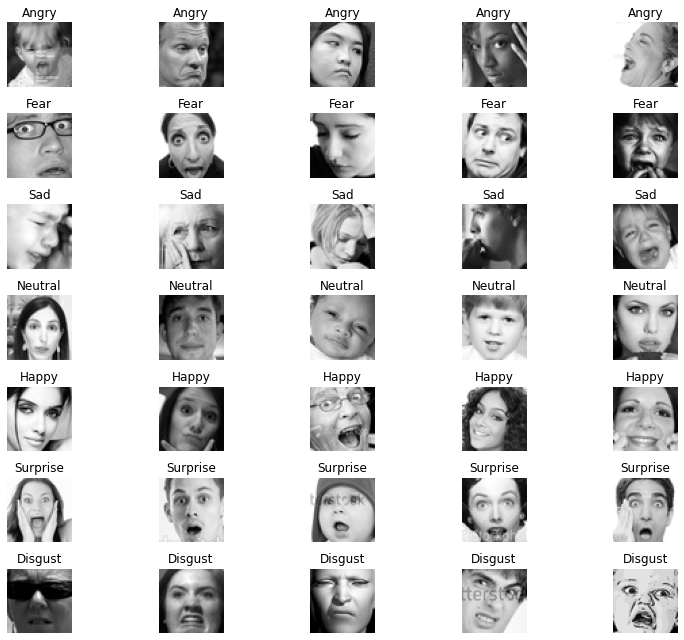

In [ ]:

plot_faces(train_data, images_per_row=5, size = 48)

### TASK 1: Face detection/Localization

Here we use OpenCV library to implement Haar Cascade[link text](https://)

In [ ]:
import cv2
import matplotlib.pyplot as plt


classifier_xml = '/content/drive/MyDrive/Data/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(classifier_xml)



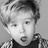

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow


images = train_data.sample(3)
# image_path =  "/content/drive/MyDrive/Data/handsome_man.jpg"

facial_exp_pixels = np.array(images.iloc[0]['pixels'].split()).astype('float32') # select one image sample
facial_exp = facial_exp_pixels.reshape(48, 48)
# facial_exp = facial_exp.reshape(96, 96)

# img = cv2.imread(image_path)
img = cv2.imwrite('exp.jpg',facial_exp)
imm = cv2.imread('exp.jpg',1)
cv2_imshow(imm)

# face = face_cascade.detectMultiScale(img, 1.1, 4)
gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray, 1.1, 4)

# type(facial_exp)

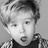

-1

In [ ]:
for (x,y,w,h) in face:
  cv2.rectangle(imm, (x,y), (x+w,y+h), (255,0,0), 1)

cv2_imshow(imm)
cv2.waitKey()

### TASK 2: Feature Extraction/Gabor Filters

Here we use OpenCV library to implement Haar Cascade[link text](https://)

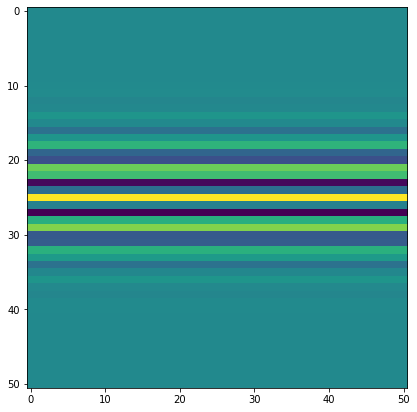

In [ ]:
#Use Gabor Filters
ksize = 50
sigma = 5
theta = 1*np.pi/2
lamda = 1*np.pi/4
gamma = 0.01
phi = 0.08

kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


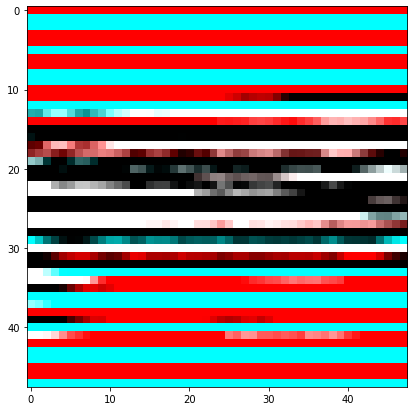

In [ ]:
face_filtered = cv2.filter2D(imm, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (48, 48))
plt.imshow(kernel_resized)
plt.imshow(face_filtered, cmap='gray')

In [ ]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters



def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        kernel_resized = cv2.resize(kern, (48, 48))
        np.maximum(accum, fimg, accum)
    return accum



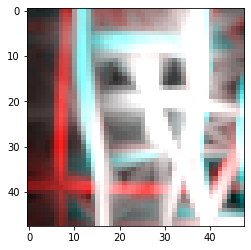

In [ ]:
filters = build_filters()

res1 = process(imm, filters)

plt.imshow(imm)
plt.imshow(res1)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
print(imm.shape, '\n', images.iloc[0].shape)
images.iloc[0]["pixels"]

NameError: ignored

In [ ]:
def build_model():
    model = Sequential()
    # Layer 1
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor,
                                      input_shape=(nb_channel, img_rows, img_cols)))
    model.add(Activation('relu'))

    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    model.add(Conv2D(32, (3, 3), kernel_initializer=custom_gabor))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# The column of the 'pixels' is strings of pixel values.
# splitting the 'pixels' column into 2304 columns (48*48), in which each column represents one-pixel value.

train_data[['Pixel_'+ str(i) for i in range(1,2305)]] = train_data.pixels.str.split(expand=True)
train_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

publictest_data[['Pixel_'+ str(i) for i in range(1,2305)]] = publictest_data.pixels.str.split(expand=True)
publictest_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

privatetest_data[['Pixel_'+ str(i) for i in range(1,2305)]] = privatetest_data.pixels.str.split(expand=True)
privatetest_data.drop(['pixels', 'Usage'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
train_data

,emotion_type,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_2295,Pixel_2296,Pixel_2297,Pixel_2298,Pixel_2299,Pixel_2300,Pixel_2301,Pixel_2302,Pixel_2303,Pixel_2304
0,Angry,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,Angry,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,Sad,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,Neutral,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,Fear,84,85,85,85,85,85,85,85,86,...,35,34,35,36,40,27,125,231,215,200
28705,Angry,114,112,113,113,111,111,112,113,115,...,83,94,107,120,141,144,132,129,182,222
28706,Sad,74,81,87,89,95,100,98,93,105,...,211,214,211,209,200,195,192,188,187,187
28707,Angry,222,227,203,90,86,90,84,77,94,...,136,139,141,145,137,139,136,136,136,134


In [ ]:
# Converting features from string to numeric
 
train_L = train_data['emotion_type']
train_data = train_data.loc[:, ~train_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
train_data = pd.DataFrame(train_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
train_data = pd.concat([train_L, train_data], axis=1)
del train_L

publictest_data_L = publictest_data['emotion_type']
publictest_data = publictest_data.loc[:, ~publictest_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
publictest_data = pd.DataFrame(publictest_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
publictest_data = pd.concat([publictest_data_L, publictest_data], axis=1)
del publictest_data_L

privatetest_data_L = privatetest_data['emotion_type']
privatetest_data = privatetest_data.loc[:, ~privatetest_data.columns.isin(['emotion_type'])].to_numpy().astype('float32')
privatetest_data = pd.DataFrame(privatetest_data, columns = ['Pixel_'+str(i) for i in range(1,2305)])
privatetest_data = pd.concat([privatetest_data_L, privatetest_data], axis=1)
del privatetest_data_L

publictest_data

,emotion_type,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_2295,Pixel_2296,Pixel_2297,Pixel_2298,Pixel_2299,Pixel_2300,Pixel_2301,Pixel_2302,Pixel_2303,Pixel_2304
0,Angry,254.0,254.0,254.0,254.0,254.0,249.0,255.0,160.0,2.0,...,90.0,92.0,99.0,84.0,22.0,0.0,0.0,42.0,129.0,180.0
1,Disgust,156.0,184.0,198.0,202.0,204.0,207.0,210.0,212.0,213.0,...,201.0,199.0,197.0,193.0,188.0,184.0,180.0,172.0,167.0,161.0
2,Sad,69.0,118.0,61.0,60.0,96.0,121.0,103.0,87.0,103.0,...,93.0,93.0,92.0,90.0,92.0,93.0,92.0,88.0,87.0,90.0
3,Neutral,205.0,203.0,236.0,157.0,83.0,158.0,120.0,116.0,94.0,...,207.0,211.0,213.0,206.0,196.0,181.0,112.0,43.0,82.0,86.0
4,Happy,87.0,79.0,74.0,66.0,74.0,96.0,77.0,80.0,80.0,...,33.0,32.0,33.0,35.0,38.0,40.0,45.0,41.0,34.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,Sad,178.0,176.0,172.0,173.0,173.0,174.0,176.0,173.0,166.0,...,13.0,19.0,24.0,32.0,32.0,22.0,15.0,14.0,15.0,19.0
3585,Happy,25.0,34.0,42.0,44.0,42.0,47.0,57.0,59.0,59.0,...,70.0,67.0,70.0,92.0,80.0,74.0,33.0,9.0,12.0,11.0
3586,Sad,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,48.0,50.0,46.0
3587,Sad,33.0,25.0,31.0,36.0,36.0,42.0,69.0,103.0,132.0,...,12.0,11.0,9.0,8.0,6.0,4.0,4.0,4.0,5.0,4.0


In [ ]:
# spliting train_data into train and validation datasets
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# spliting features and labels in train, validation, publictest, and privatetest

''''# datasets for KNN
y_train_data = train_data['emotion_type']
X_train_data = train_data.drop(['emotion_type'], axis=1)

# datasets for neural network, DNN, and CNN'''
y_train = train['emotion_type']
X_train = train.drop(['emotion_type'], axis=1)

y_val = validation['emotion_type']
X_val = validation.drop(['emotion_type'], axis=1)

y_pbtest = publictest_data['emotion_type']
X_pbtest = publictest_data.drop(['emotion_type'], axis=1)

y_pvtest = privatetest_data['emotion_type']
X_pvtest = privatetest_data.drop(['emotion_type'], axis=1)

In [ ]:
#print('Shape of X_train_data: ', X_train_data.shape)
#print('Shape of y_train_data: ', y_train_data.shape)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of X_pbtest: ', X_pbtest.shape)
print('Shape of y_pbtest: ', y_pbtest.shape)
print('Shape of X_pvtest: ', X_pvtest.shape)
print('Shape of y_pvtest: ', y_pvtest.shape)

Shape of X_train:  (22967, 2304)
Shape of y_train:  (22967,)
Shape of X_val:  (5742, 2304)
Shape of y_val:  (5742,)
Shape of X_pbtest:  (3589, 2304)
Shape of y_pbtest:  (3589,)
Shape of X_pvtest:  (3589, 2304)
Shape of y_pvtest:  (3589,)


In [ ]:
# Normalization for neural network, DNN, and CNN

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_pbtest_scaled = scaler.transform(X_pbtest)
X_pvtest_scaled = scaler.transform(X_pvtest)

In [ ]:
# Converting categorical labels to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
y_pbtest_le = le.transform(y_pbtest)
y_pvtest_le = le.transform(y_pvtest)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [ ]:
#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical

y_train_c = to_categorical(y_train_le, 7)
y_val_c = to_categorical(y_val_le, 7)
y_pbtest_c = to_categorical(y_pbtest_le, 7)
y_pvtest_c = to_categorical(y_pvtest_le, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)
print('Categorical Public Test Labels Matrix: ', y_pbtest_c.shape)
print('Categorical Private Test Labels Matrix: ', y_pvtest_c.shape)

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)
Categorical Public Test Labels Matrix:  (3589, 7)
Categorical Private Test Labels Matrix:  (3589, 7)


In [ ]:
# MODEL 1: 1 HIDDEN LAYER, 100 NODES

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


ES_callback = EarlyStopping(monitor='val_loss', patience=4, mode='min', min_delta=0.0001)

mod1 = Sequential()
mod1.add(Dense(100, input_shape=(2304,), activation='relu'))
mod1.add(Dense(7, activation = 'softmax'))
mod1.compile(loss = "categorical_crossentropy", optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod1_history = mod1.fit(X_train_scaled, y_train_c, batch_size=128, 
                          validation_data=(X_val_scaled, y_val_c), epochs = 150, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/150
180/180 [==============================] - 3s 10ms/step - loss: 1.9012 - accuracy: 0.3227 - val_loss: 1.7801 - val_accuracy: 0.3347
Epoch 2/150
180/180 [==============================] - 1s 8ms/step - loss: 1.6345 - accuracy: 0.3928 - val_loss: 1.7544 - val_accuracy: 0.3729
Epoch 3/150
180/180 [==============================] - 1s 8ms/step - loss: 1.5137 - accuracy: 0.4334 - val_loss: 1.6637 - val_accuracy: 0.3750
Epoch 4/150
180/180 [==============================] - 1s 8ms/step - loss: 1.4314 - accuracy: 0.4601 - val_loss: 1.6474 - val_accuracy: 0.3838
Epoch 5/150
180/180 [==============================] - 2s 10ms/step - loss: 1.3809 - accuracy: 0.4785 - val_loss: 1.6320 - val_accuracy: 0.3915
Epoch 6/150
180/180 [==============================] - 1s 6ms/step - loss: 1.3367 - accuracy: 0.5001 - val_loss: 1.6480 - val_accuracy: 0.3938
Epoch 7/150
180/180 [==============================] - 1s 5ms/step - loss: 1.2753 - accuracy: 0.5254 - val_loss: 1.6454 - val_accuracy: 0.39

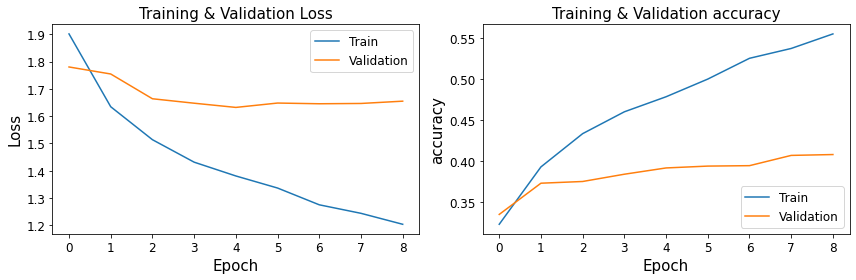

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod1_history.history['loss'], label='Train')
plt.plot(mod1_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod1_history.history['accuracy'], label='Train')
plt.plot(mod1_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod1.predict(X_train_scaled)
val_preds = mod1.predict(X_val_scaled)
pbtest_preds = mod1.predict(X_pbtest_scaled)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.60047 (60.047%)
Accuracy on validation dataset: 0.40787 (40.787%)
Accuracy on test dataset: 0.40652 (40.652%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.48105 (48.105%)
Accuracy of class 1 on train dataset: 0.38227 (38.227%)
Accuracy of class 2 on train dataset: 0.48928 (48.928%)
Accuracy of class 3 on train dataset: 0.77960 (77.960%)
Accuracy of class 4 on train dataset: 0.50616 (50.616%)
Accuracy of class 5 on train dataset: 0.56808 (56.808%)
Accuracy of class 6 on train dataset: 0.71908 (71.908%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.23126 (23.126%)
Accuracy of class 1 on validation dataset: 0.16071 (16.071%)
Accuracy of class 2 on validation dataset: 0.19758 (19.758%)
Accuracy of class 3 on validation dataset: 0.65810 (65.810%)
Accuracy of class 4 on validation dataset: 0.33114 (33.114%)
Accuracy of class 5 on validation dataset: 0.33997 (33.997%)
Accuracy of class 6 on validation dataset: 0.55904 (55.904%)


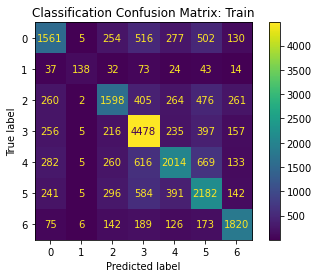

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

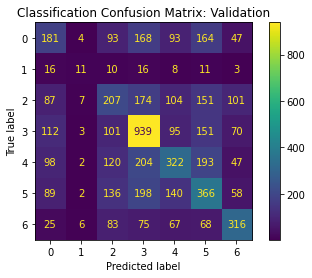

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

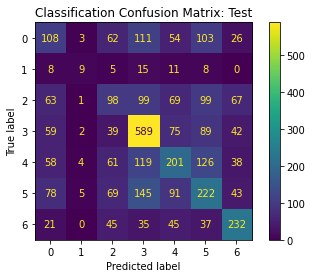

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
nn_dict = {'Method':'Neural Network(1HL:100N)',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = pd.DataFrame([nn_dict])
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.60047,0.407872,0.40652


In [ ]:
# Creating deep neural network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

'''initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)'''

ES_callback = EarlyStopping(monitor='val_loss', patience=8, mode='min', min_delta=0.0001)
     
def build_model(n_layers=5, n_neurons=1000):
   model = Sequential()
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'tanh'))
       model.add(BatchNormalization())
       model.add(Dropout(0.2))
   model.add(Dense(7, activation = 'softmax')) 
   return model

In [ ]:
mod2 = build_model(n_layers = 4, n_neurons = 100)
mod2.compile(loss = "categorical_crossentropy", optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod2_history = mod2.fit(X_train_scaled, y_train_c, batch_size=128, 
                          validation_data=(X_val_scaled, y_val_c), epochs = 150, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/150
180/180 [==============================] - 8s 26ms/step - loss: 2.0105 - accuracy: 0.2405 - val_loss: 1.7053 - val_accuracy: 0.3305
Epoch 2/150
180/180 [==============================] - 3s 14ms/step - loss: 1.7856 - accuracy: 0.3029 - val_loss: 1.6739 - val_accuracy: 0.3356
Epoch 3/150
180/180 [==============================] - 2s 14ms/step - loss: 1.7197 - accuracy: 0.3274 - val_loss: 1.6438 - val_accuracy: 0.3572
Epoch 4/150
180/180 [==============================] - 3s 14ms/step - loss: 1.6798 - accuracy: 0.3391 - val_loss: 1.6404 - val_accuracy: 0.3661
Epoch 5/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6504 - accuracy: 0.3552 - val_loss: 1.6248 - val_accuracy: 0.3669
Epoch 6/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6309 - accuracy: 0.3643 - val_loss: 1.6172 - val_accuracy: 0.3725
Epoch 7/150
180/180 [==============================] - 2s 13ms/step - loss: 1.6109 - accuracy: 0.3705 - val_loss: 1.6094 - val_accuracy:

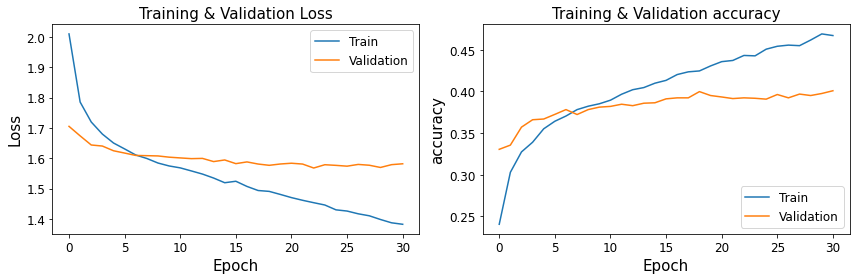

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod2_history.history['loss'], label='Train')
plt.plot(mod2_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod2_history.history['accuracy'], label='Train')
plt.plot(mod2_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod2.predict(X_train_scaled)
val_preds = mod2.predict(X_val_scaled)
pbtest_preds = mod2.predict(X_pbtest_scaled)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.53433 (53.433%)
Accuracy on validation dataset: 0.40091 (40.091%)
Accuracy on test dataset: 0.42184 (42.184%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.41448 (41.448%)
Accuracy of class 1 on train dataset: 0.22715 (22.715%)
Accuracy of class 2 on train dataset: 0.33650 (33.650%)
Accuracy of class 3 on train dataset: 0.78273 (78.273%)
Accuracy of class 4 on train dataset: 0.52325 (52.325%)
Accuracy of class 5 on train dataset: 0.40094 (40.094%)
Accuracy of class 6 on train dataset: 0.64322 (64.322%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_val_le[y_val_le==i]
  pred_label = val_preds_labels[y_val_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.26267 (26.267%)
Accuracy of class 1 on validation dataset: 0.06667 (6.667%)
Accuracy of class 2 on validation dataset: 0.20457 (20.457%)
Accuracy of class 3 on validation dataset: 0.66417 (66.417%)
Accuracy of class 4 on validation dataset: 0.37120 (37.120%)
Accuracy of class 5 on validation dataset: 0.29323 (29.323%)
Accuracy of class 6 on validation dataset: 0.46406 (46.406%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.28480 (28.480%)
Accuracy of class 1 on validation dataset: 0.10714 (10.714%)
Accuracy of class 2 on validation dataset: 0.19153 (19.153%)
Accuracy of class 3 on validation dataset: 0.68939 (68.939%)
Accuracy of class 4 on validation dataset: 0.40692 (40.692%)
Accuracy of class 5 on validation dataset: 0.30168 (30.168%)
Accuracy of class 6 on validation dataset: 0.52771 (52.771%)


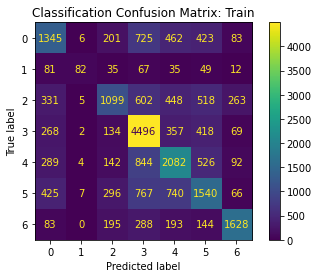

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

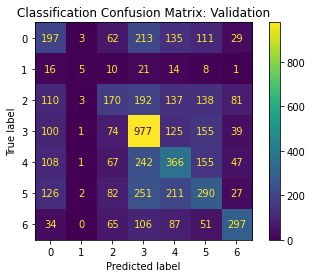

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

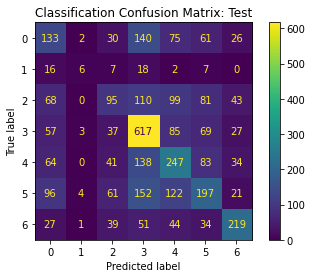

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
dnn_dict = {'Method':'Deep Neural Network(4HL:100N)',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = models_comp.append([dnn_dict], ignore_index=True)
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.600470,0.407872,0.406520
1,Deep Neural Network(4HL:100N),0.534332,0.400906,0.421845


In [ ]:
# Reshaping data for CNN

X_train_scaled_cnn = X_train_scaled.reshape((22967, 48, 48, 1))
X_val_scaled_cnn = X_val_scaled.reshape((5742, 48, 48, 1))
X_pbtest_scaled_cnn = X_pbtest_scaled.reshape((3589, 48, 48, 1))
X_pvtest_scaled_cnn = X_pvtest_scaled.reshape((3589, 48, 48, 1))

print('Shape of X_train: ', X_train_scaled_cnn.shape)
print('Shape of X_val: ', X_val_scaled_cnn.shape)
print('Shape of X_pbtest: ', X_pbtest_scaled_cnn.shape)
print('Shape of X_pvtest: ', X_pvtest_scaled_cnn.shape, '\n')

print('Shape of y_train: ', y_train_c.shape)
print('Shape of y_val: ', y_val_c.shape)
print('Shape of y_pbtest: ', y_pbtest_c.shape)
print('Shape of y_pvtest: ', y_pvtest_c.shape)

Shape of X_train:  (22967, 48, 48, 1)
Shape of X_val:  (5742, 48, 48, 1)
Shape of X_pbtest:  (3589, 48, 48, 1)
Shape of X_pvtest:  (3589, 48, 48, 1) 

Shape of y_train:  (22967, 7)
Shape of y_val:  (5742, 7)
Shape of y_pbtest:  (3589, 7)
Shape of y_pvtest:  (3589, 7)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

mod3 = Sequential() # create Sequential model
mod3.add(Conv2D(32, (3,3), input_shape=(48,48,1), padding='same', activation = 'relu')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Conv2D(64, (3,3), padding='same')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Conv2D(128, (3,3), padding='same')) 
mod3.add(BatchNormalization())
mod3.add(MaxPooling2D(pool_size=(2,2)))
mod3.add(Dropout(0.2))
mod3.add(Flatten())
mod3.add(Dense(7, activation = 'softmax')) 
mod3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
import time
start = time.time()
mod3_history = mod3.fit(X_train_scaled_cnn, y_train_c,
                        validation_data=(X_val_scaled_cnn, y_val_c), 
                        batch_size=64, epochs = 25, callbacks=[ES_callback])
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/25
359/359 [==============================] - 18s 23ms/step - loss: 1.9600 - accuracy: 0.3278 - val_loss: 1.6238 - val_accuracy: 0.3969
Epoch 2/25
359/359 [==============================] - 7s 20ms/step - loss: 1.6118 - accuracy: 0.4175 - val_loss: 1.4705 - val_accuracy: 0.4577
Epoch 3/25
359/359 [==============================] - 7s 19ms/step - loss: 1.4803 - accuracy: 0.4530 - val_loss: 1.5349 - val_accuracy: 0.4457
Epoch 4/25
359/359 [==============================] - 7s 20ms/step - loss: 1.3785 - accuracy: 0.4853 - val_loss: 1.4088 - val_accuracy: 0.4770
Epoch 5/25
359/359 [==============================] - 7s 20ms/step - loss: 1.2986 - accuracy: 0.5159 - val_loss: 1.3573 - val_accuracy: 0.4983
Epoch 6/25
359/359 [==============================] - 7s 19ms/step - loss: 1.2541 - accuracy: 0.5346 - val_loss: 1.3136 - val_accuracy: 0.5101
Epoch 7/25
359/359 [==============================] - 7s 19ms/step - loss: 1.2033 - accuracy: 0.5528 - val_loss: 1.2956 - val_accuracy: 0.520

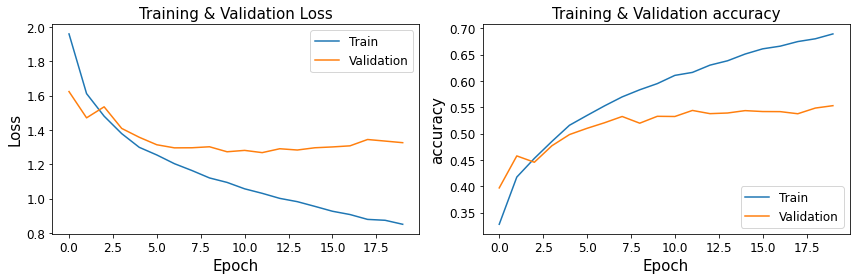

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(mod3_history.history['loss'], label='Train')
plt.plot(mod3_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(mod3_history.history['accuracy'], label='Train')
plt.plot(mod3_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = mod3.predict(X_train_scaled_cnn)
val_preds = mod3.predict(X_val_scaled_cnn)
pbtest_preds = mod3.predict(X_pbtest_scaled_cnn)
print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of pbtest_preds matrix: ', pbtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of pbtest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))

Accuracy on train dataset: 0.82166 (82.166%)
Accuracy on validation dataset: 0.55312 (55.312%)
Accuracy on test dataset: 0.53692 (53.692%)


In [ ]:
#calculate per-class classification accuracy

#on train dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_train_le[y_train_le==i]
  pred_label = train_preds_labels[y_train_le==i]
  print('Accuracy of class {} on train dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on train dataset: 0.72881 (72.881%)
Accuracy of class 1 on train dataset: 0.91967 (91.967%)
Accuracy of class 2 on train dataset: 0.74158 (74.158%)
Accuracy of class 3 on train dataset: 0.91957 (91.957%)
Accuracy of class 4 on train dataset: 0.80548 (80.548%)
Accuracy of class 5 on train dataset: 0.78365 (78.365%)
Accuracy of class 6 on train dataset: 0.89095 (89.095%)


In [ ]:
#calculate per-class classification accuracy

#on validation dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_val_le[y_val_le==i]
  pred_label = val_preds_labels[y_val_le==i]
  print('Accuracy of class {} on validation dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on validation dataset: 0.37600 (37.600%)
Accuracy of class 1 on validation dataset: 0.48000 (48.000%)
Accuracy of class 2 on validation dataset: 0.36943 (36.943%)
Accuracy of class 3 on validation dataset: 0.77634 (77.634%)
Accuracy of class 4 on validation dataset: 0.54665 (54.665%)
Accuracy of class 5 on validation dataset: 0.43984 (43.984%)
Accuracy of class 6 on validation dataset: 0.67969 (67.969%)


In [ ]:
#calculate per-class classification accuracy

#on test dataset
for i in range(len(train_data['emotion_type'].unique())):
  actual_label = y_pbtest_le[y_pbtest_le==i]
  pred_label = pbtest_preds_labels[y_pbtest_le==i]
  print('Accuracy of class {} on test dataset: {:.5f} ({:.3f}%)'
  .format(i, accuracy_score(actual_label, pred_label), accuracy_score(actual_label, pred_label)*100))

Accuracy of class 0 on test dataset: 0.40257 (40.257%)
Accuracy of class 1 on test dataset: 0.46429 (46.429%)
Accuracy of class 2 on test dataset: 0.34677 (34.677%)
Accuracy of class 3 on test dataset: 0.76089 (76.089%)
Accuracy of class 4 on test dataset: 0.48929 (48.929%)
Accuracy of class 5 on test dataset: 0.40888 (40.888%)
Accuracy of class 6 on test dataset: 0.71325 (71.325%)


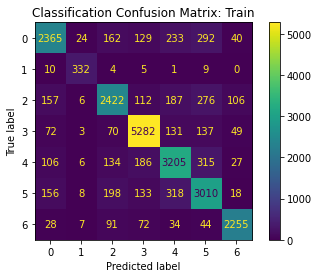

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

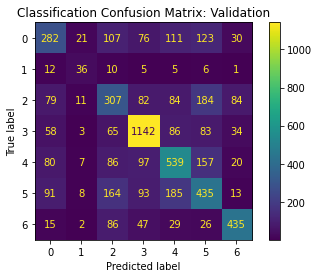

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

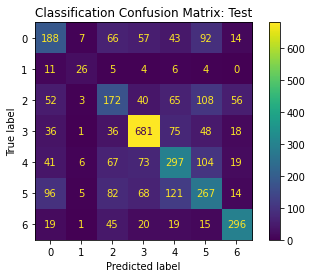

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Test', fontsize=12)
plt.show()

In [ ]:
cnn_dict = {'Method':'Convolutional Neural Network',
           'Train': accuracy_score(y_train_le, train_preds_labels),
           'Validation': accuracy_score(y_val_le, val_preds_labels),
           'Test': accuracy_score(y_pbtest_le, pbtest_preds_labels)}

models_comp = models_comp.append([cnn_dict], ignore_index=True)
models_comp

,Method,Train,Validation,Test
0,Neural Network(1HL:100N),0.600470,0.407872,0.406520
1,Deep Neural Network(4HL:100N),0.534332,0.400906,0.421845
2,Convolutional Neural Network,0.821657,0.553117,0.536918


In [ ]:
mod1.save('NN on Final Project_mod1.h5')
mod2.save('NN on Final Project_mod2.h5')
mod3.save('NN on Final Project_mod3.h5')